This notebook is based on 297 works found in OpenAlex for people from our group. Sorry, not everyone was in the top 10 and I couldn't figure out how to see more to select extra authors...
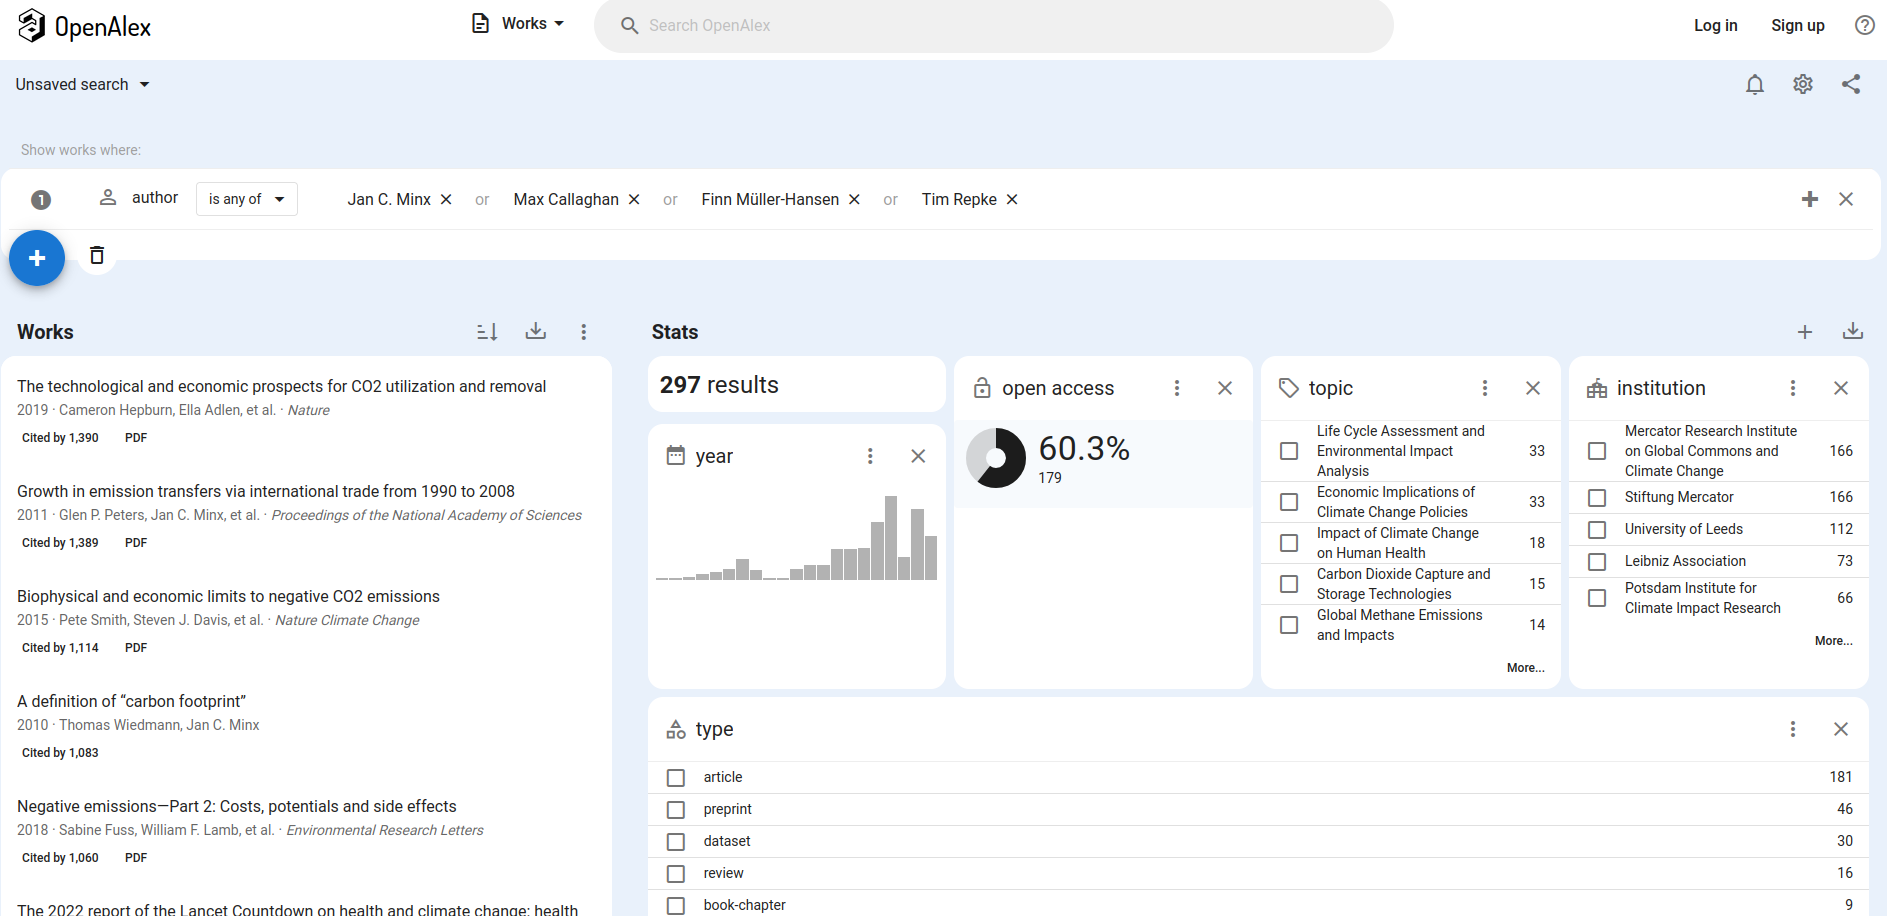

In [17]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [25]:
df = pd.read_csv('data/works-2024-08-29T12-54-58.csv')
df = df.replace({np.nan: None})
print(list(df.columns))
print(df.shape)
df.head()

['id', 'doi', 'title', 'display_name', 'publication_year', 'publication_date', 'language', 'type', 'type_crossref', 'indexed_in', 'countries_distinct_count', 'institutions_distinct_count', 'corresponding_author_ids', 'corresponding_institution_ids', 'apc_paid', 'fwci', 'has_fulltext', 'cited_by_count', 'is_retracted', 'is_paratext', 'locations_count', 'datasets', 'versions', 'referenced_works_count', 'referenced_works', 'related_works', 'cited_by_api_url', 'updated_date', 'created_date', 'ids.openalex', 'ids.doi', 'ids.mag', 'ids.pmid', 'primary_location.is_oa', 'primary_location.landing_page_url', 'primary_location.pdf_url', 'primary_location.source.id', 'primary_location.source.display_name', 'primary_location.source.issn_l', 'primary_location.source.issn', 'primary_location.source.is_oa', 'primary_location.source.is_in_doaj', 'primary_location.source.is_core', 'primary_location.source.host_organization', 'primary_location.source.host_organization_name', 'primary_location.source.host

id  \
0  https://openalex.org/W2988278250   
1  https://openalex.org/W1984190418   
2  https://openalex.org/W2195453830   
3  https://openalex.org/W2983557247   
4  https://openalex.org/W2804406438   

                                         doi  \
0  https://doi.org/10.1038/s41586-019-1681-6   
1    https://doi.org/10.1073/pnas.1006388108   
2       https://doi.org/10.1038/nclimate2870   
3                                       None   
4   https://doi.org/10.1088/1748-9326/aabf9f   

                                               title  \
0  The technological and economic prospects for C...   
1  Growth in emission transfers via international...   
2  Biophysical and economic limits to negative CO...   
3                 A definition of “carbon footprint”   
4  Negative emissions—Part 2: Costs, potentials a...   

                                        display_name  publication_year  \
0  The technological and economic prospects for C...              2019   
1  Growth in emission transfers via international...              2011   
2  Biophysical and economic limits to negative CO...              2015   
3                 A definition of “carbon footprint”              2010   
4  Negative emissions—Part 2: Costs, potentials a...              2018   

  publication_date language     type    type_crossref       indexed_in  \
0       2019-11-06       en   review  journal-article  crossref|pubmed   
1       2011-04-25       en  article  journal-article  crossref|pubmed   
2       2015-12-07       en  article  journal-article         crossref   
3       2010-01-15       en  article  journal-article             None   
4       2018-05-21       en  article  journal-article         crossref   

   countries_distinct_count  institutions_distinct_count  \
0                         3                            5   
1                         4                            6   
2                        13                           34   
3                         0                            0   
4                         5                           10   

           corresponding_author_ids     corresponding_institution_ids  \
0                              None                              None   
1  https://openalex.org/A5040159612  https://openalex.org/I4210108282   
2  https://openalex.org/A5028843362   https://openalex.org/I195460627   
3                              None                              None   
4  https://openalex.org/A5011197728  https://openalex.org/I4210086490   

  apc_paid     fwci  has_fulltext  cited_by_count  is_retracted  is_paratext  \
0     None   20.421         False            1390         False        False   
1     None   69.589          True            1389         False        False   
2     None  199.094          True            1114         False        False   
3     None   37.733         False            1083         False        False   
4     None   63.579         False            1060         False        False   

   locations_count datasets versions  referenced_works_count  \
0                4     None     None                      88   
1                4     None     None                      43   
2                6     None     None                     102   
3                1     None     None                      19   
4                5     None     None                     401   

                                    referenced_works  \
0  https://openalex.org/W1007704209|https://opena...   
1  https://openalex.org/W1534847451|https://opena...   
2  https://openalex.org/W1576280030|https://opena...   
3  https://openalex.org/W143708733|https://openal...   
4  https://openalex.org/W1006569679|https://opena...   

                                       related_works  \
0  https://openalex.org/W4231076513|https://opena...   
1  https://openalex.org/W651033550|https://openal...   
2  https://openalex.org/W96612179|https://openale...   
3  https://openalex.org/W2767418319|https://opena...   

## Most common "topics" (domain) associated with our work
> Works in OpenAlex are tagged with Topics using an automated system that takes into account the available information about the work, including title, abstract, source (journal) name, and citations. There are around 4,500 Topics.    
> See https://docs.openalex.org/api-entities/topics

In [14]:
df['topics.domain.display_name'].value_counts()

topics.domain.display_name
Physical Sciences|Physical Sciences|Physical Sciences    45
Physical Sciences|Social Sciences|Physical Sciences      30
Social Sciences|Physical Sciences|Physical Sciences      25
Physical Sciences                                        23
Physical Sciences|Physical Sciences|Social Sciences      23
Physical Sciences|Physical Sciences                      20
Social Sciences                                          20
Physical Sciences|Social Sciences|Social Sciences        19
Social Sciences|Social Sciences|Physical Sciences        14
Social Sciences|Physical Sciences|Social Sciences        13
Social Sciences|Social Sciences|Social Sciences          13
Physical Sciences|Social Sciences                         8
Physical Sciences|Physical Sciences|Health Sciences       5
Social Sciences|Social Sciences                           5
Social Sciences|Physical Sciences                         4
Life Sciences|Physical Sciences|Social Sciences           3
Health Scienc

## Most common "topics" (field) associated with our work
> Works in OpenAlex are tagged with Topics using an automated system that takes into account the available information about the work, including title, abstract, source (journal) name, and citations. There are around 4,500 Topics.    
> See https://docs.openalex.org/api-entities/topics

In [15]:
df['topics.field.display_name'].value_counts()

topics.field.display_name
Environmental Science|Environmental Science|Social Sciences                                                    9
Social Sciences                                                                                                9
Environmental Science                                                                                          9
Environmental Science|Environmental Science                                                                    8
Environmental Science|Social Sciences|Social Sciences                                                          7
Environmental Science|Environmental Science|Environmental Science                                              7
Environmental Science|Economics, Econometrics and Finance|Energy                                               6
Economics, Econometrics and Finance|Economics, Econometrics and Finance|Economics, Econometrics and Finance    6
Economics, Econometrics and Finance                                   

## Most common "keywords" associated with our work
> Our team put together a new implementation of keywords based on our Topics. There are currently over 26,000 keywords and we expect to add more as time goes on.   
> See https://help.openalex.org/hc/en-us/articles/24736201130391-Keywords

In [50]:
Counter([kw for _, r in df.iterrows() for kw in (r['keywords.display_name'] or '').split('|')]).most_common()

[('Carbon Pricing', 36),
 ('', 31),
 ('Consumption (sociology)', 22),
 ('Emissions', 20),
 ('CO2 Separation', 17),
 ('Sustainability', 17),
 ('Mitigation Strategies', 17),
 ('Sustainability Assessment', 15),
 ('CO2 Capture Technology', 14),
 ('Carbon Dioxide Capture', 14),
 ('Earth system science', 13),
 ('Climate Change Adaptation', 11),
 ('Carbon Footprint', 10),
 ('Environmental Policy', 10),
 ('Climate Modeling', 10),
 ('Policy Instruments', 10),
 ('Input-Output Analysis', 8),
 ('Adaptation', 8),
 ('Environmental Attitudes', 8),
 ('Negative Emissions', 7),
 ('Countdown', 7),
 ('Sustainability Transitions', 7),
 ('Footprint', 7),
 ('Deforestation (computer science)', 7),
 ('Carbon dioxide removal', 6),
 ('Carbon fibers', 6),
 ('Environmental Correlates', 6),
 ('Topic Modeling', 6),
 ('Ecosystem Resilience', 6),
 ('Information Visualization', 6),
 ('CO2 Emissions', 5),
 ('Water Footprint', 5),
 ('Emission Modeling', 5),
 ('Relevance (law)', 5),
 ('Adaptive Governance', 5),
 ('Scope (

## Most common "concepts" associated with our work
> Concepts are abstract ideas that works are about. OpenAlex indexes about 65k concepts.   
See https://docs.openalex.org/api-entities/concepts

In [21]:
Counter([kw for _, r in df.iterrows() for kw in (r['concepts.display_name'] or '').split('|')]).most_common()

[('Computer science', 152),
 ('Biology', 138),
 ('Environmental science', 137),
 ('Ecology', 133),
 ('Economics', 128),
 ('Climate change', 112),
 ('Geography', 90),
 ('Political science', 85),
 ('Natural resource economics', 77),
 ('Business', 77),
 ('Environmental resource management', 76),
 ('Engineering', 72),
 ('Greenhouse gas', 69),
 ('Geology', 61),
 ('Law', 60),
 ('Artificial intelligence', 54),
 ('Archaeology', 46),
 ('Oceanography', 44),
 ('Psychology', 44),
 ('Sociology', 41),
 ('Environmental economics', 38),
 ('Data science', 37),
 ('Medicine', 34),
 ('Climate change mitigation', 33),
 ('Mathematics', 33),
 ('Chemistry', 32),
 ('Social science', 32),
 ('Programming language', 32),
 ('Physics', 31),
 ('Philosophy', 27),
 ('Organic chemistry', 26),
 ('Environmental planning', 26),
 ('Operating system', 24),
 ('Consumption (sociology)', 23),
 ('Global warming', 23),
 ('Neuroscience', 23),
 ('Carbon dioxide', 22),
 ('Climatology', 22),
 ('Finance', 21),
 ('Mechanical engineeri

## Most common SDGs associated with our work
> The United Nations' 17 Sustainable Development Goals are a collection of goals at the heart of a global "shared blueprint for peace and prosperity for people and the planet." We use a machine learning model to tag works with their relevance to these goals based on our OpenAlex SDG Classifier[...]   
> See https://docs.openalex.org/api-entities/works/work-object#sustainable_development_goals

In [24]:
df['sustainable_development_goals.display_name'].value_counts()

sustainable_development_goals.display_name
Climate action                                       126
Life on land                                          15
Responsible consumption and production                13
Affordable and clean energy                            7
Peace, justice, and strong institutions                7
Zero hunger                                            6
Quality education                                      5
Sustainable cities and communities                     4
Decent work and economic growth                        3
Reduced inequalities                                   3
Industry, innovation and infrastructure                2
Clean water and sanitation                             2
Partnerships for the goals                             2
Sustainable cities and communities|Climate action      1
No poverty                                             1
Name: count, dtype: int64

## Common words in title/abstract
Simply counting the most common tokens, ignoring common English words

In [49]:
texts = [f'{row['title'] or ''} {row['abstract'] or ''}' for _, row in df.iterrows()]
vec = CountVectorizer(stop_words='english')
vecs = vec.fit_transform(texts)
vocab = {v: k for k, v in vec.vocabulary_.items()}
counts = np.squeeze(np.asarray(vecs.sum(axis=0)))
top_words = np.argsort(counts)
for tok in top_words[::-1][:100]:
    print(counts[tok], vocab[tok])

711 climate
371 emissions
366 change
272 global
230 health
225 evidence
186 carbon
179 policy
162 sub
155 research
143 strong
142 human
136 based
134 systematic
132 span
132 mitigation
132 energy
131 adaptation
127 literature
121 use
108 methods
108 land
103 countries
101 analysis
97 data
96 social
94 review
94 learning
91 policies
91 warming
91 gas
90 campbell
88 impacts
84 related
83 greenhouse
82 report
81 ipcc
78 papers
77 ghg
75 solutions
75 coal
74 indicator
73 machine
72 using
72 class
70 studies
69 reductions
66 scientific
66 synthesis
65 formula
65 inline
65 dataset
64 al
64 et
64 model
63 reviews
63 high
61 systems
61 assessment
61 science
60 2019
60 abstract
60 models
60 decade
60 comprehensive
58 indicators
58 topic
57 assessments
57 development
55 key
55 relevant
55 documents
55 need
54 scenarios
54 results
54 different
54 consumption
54 progress
53 removal
53 sector
52 2018
52 public
52 technologies
52 national
52 nets
51 potential
51 information
49 economic
49 earth
49 d